# 14 minutes to QCoDeS

## Introduction
[QCoDeS](https://microsoft.github.io/Qcodes/index.html) in an excellent software package developed by Microsoft for experiment control in Python.

This document complements Microsoft's own introduction [15 minutes to QCoDeS](https://microsoft.github.io/Qcodes/examples/basic_examples/15_minutes_to_QCoDeS.html#).
My aim is to make learning QCoDeS easier for the novice by giving very prescriptive instructions on how to install it and set up an experiment, and then giving several examples of the all-important doNd sweep routines.

In this example, we use dummy instruments that exist only in software. In a real experiment, you will incorporate real instrument drivers; it will hopefully be clear how these examples should be modified.

## Install the software you need
### Install Python
Get python from https://docs.anaconda.com/free/miniconda/.
### Create and activate the qcodes environment
Start the anaconda prompt (e.g. by typing 'anaconda' in the Windows search box) and run

    conda create -n qcodes
    conda activate qcodes

### Install necessary packages
These are the packages you need:
- QCoDeS itself
- [JupyterLab](https://jupyter.o.rg/), a good integrated development environment.
- [Plottr](https://github.com/toolsforexperiments/plottr), a real-time plotter for QCoDeS datasets.
- [PyVISA](https://pyvisa.readthedocs.io/en/latest/), which is National Instruments' library for communicating with instruments.
- [QCoDeS_contrib_drivers](https://github.com/QCoDeS/Qcodes_contrib_drivers), which is a community ibrary of instrument drivers not part of the QCoDeS package.
(The rest of this notebook will work without the last two, but you won't be able to do real experiments.)

To install them, run the following at the anaconda prompt (and therefore still in the qcodes environment you just activated):

    pip install --upgrade qcodes
    pip install --upgrade jupyterlab
    pip install --upgrade plottr[PyQt5]
    pip install --upgrade pyvisa
    pip install --upgrade qcodes_contrib_drivers
    
Download the [NI-VISA package](https://www.ni.com/en/support/downloads/drivers/download.ni-visa.html) and install it as instructed.

### Open this notebook in JupyterLab
Save this notebook file to your computer. To open it in JupyterLab, run at the anaconda prompt:

    conda activate qcodes
    jupyter lab

and use the Jupyter interface to open it. You are now ready to run a dummy experiment in Jupyter.


## Set up the acquisition environment
You will run these commands rarely, once at the beginning of the experiment and possibly later if you need to set up new instruments.
### Import the necessary modules
Import the modules necessary to perform simple measurements and sweeps using dummy instruments.

In [1]:
import os

import qcodes as qc
from qcodes.dataset import (
    do0d,
    do1d,
    do2d,
    initialise_or_create_database_at,
    load_or_create_experiment,
)
from qcodes.instrument_drivers.mock_instruments import (
    DummyInstrument,
    DummyInstrumentWithMeasurement,
    DummyChannelInstrument
)

### Set up the experiment
Perform a series of steps to set up the experiment with proper logging and a database into which your sweep results will be stored.

In [2]:
#Turn on logging:
qc.logger.start_all_logging()

# Close all open instruments (to avoid duplication later):
qc.Instrument.close_all()

# Set up the station with instruments:
station = qc.Station()

# Set up the database:
db_file_path = os.path.join(os.getcwd(), 'Demo_db.db')
initialise_or_create_database_at(db_file_path)
exp = load_or_create_experiment(experiment_name='Demo_experiment', sample_name="no sample")

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\lairde\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\lairde\.qcodes\logs\240821-29444-qcodes.log


### Set up the individual instruments
This example uses three dummy instruments created with QCoDeS:
- a digital-to-analog converter (DAC) which outputs a voltage on each of its two channels.
- a digital multimeter (DMM) which reads one value of the voltage on each of its two inputs.
- an oscilloscope, which reads a trace on each of its inputs.

In a real experiment, you would obviously set up real instruments here.

In [3]:
dac = DummyInstrument('dac', gates=['ch1', 'ch2'])
dmm = DummyInstrumentWithMeasurement('dmm', setter_instr=dac)
oscilloscope = DummyChannelInstrument('oscilloscope')

### Set up live plotting
We will use live plotting as the sweeps run. To make this work, start plottr-inspectr by doing the following:

1. Open a new anaconda terminal and run

        conda activate qcodes
        plottr-inspectr
 
2. The plottr-inspect window should now appear. Do File->Load to load the database file you created using load_or_create_experiment above.

3. Set the "Refresh interval" to be 0.2s ad make sure "Autoplot new" is ticked.

4. As you run sweeps below, you should see the data appear in the inspector.

## Run the experiment
You can run these commands many times during the experiment, with different settings depending on what and how you want to measure.
### Set and read parameters

In [4]:
# Commands to read individual instrument parameters:
dmm.v1()    # Read and print voltage 1 input of the DMM
dmm.v2()    # Read and print voltage 2 input of the DMM (thus overwriting the output of the previous line)

0.7597125276656644

In [5]:
# Commands to set individual instrument parameters:
dac.ch1(10) # Set channel 1 output of the DAC
dac.ch2(20)

# Command to print the DAC state:
dac.print_readable_snapshot()

dac:
	parameter      value
--------------------------------------------------------------------------------
IDN             :	None 
ch1             :	10 (V)
ch2             :	20 (V)
fixed_parameter :	5 


### Run sweeps
Run the following example sweeps using dummy instruments. We use two types of sweep: point-by-point and trace-by-trace.

If you need to abort a sweep, hit `Ctrl-C` twice.

If you want to look at a sweep after it has finished, use the plottr-inspector window. This also shows information from the log file, such as what states other instruments were in while the sweep was running.

#### Examples of point-by-point sweeps
In these sweeps, the control parameter(s) are rastered in a 1D or 2D array, and at each element of the array the voltage(s) measured by the DMM are recorded.

Starting experimental run with id: 76. Using 'qcodes.dataset.do1d'
Starting experimental run with id: 77. Using 'qcodes.dataset.do1d'
Starting experimental run with id: 78. Using 'qcodes.dataset.do1d'
Starting experimental run with id: 79. Using 'qcodes.dataset.do2d'


(results #79@C:\Users\lairde\OneDrive - Lancaster University\OneDrive Documents\Teaching\My classes\Python sandpit\Demo_db.db
 ----------------------------------------------------------------------------------------------------------------------------
 dac_ch1 - numeric
 dac_ch2 - numeric
 dmm_v1 - numeric
 dmm_v2 - numeric,
 (<Axes: title={'center': 'Run #79, Experiment Demo_experiment (no sample)'}, xlabel='Gate ch1 (V)', ylabel='Gate ch2 (V)'>,
  <Axes: title={'center': 'Run #79, Experiment Demo_experiment (no sample)'}, xlabel='Gate ch1 (V)', ylabel='Gate ch2 (V)'>),
 (<matplotlib.colorbar.Colorbar at 0x2106b741820>,
  <matplotlib.colorbar.Colorbar at 0x2106b828c50>))

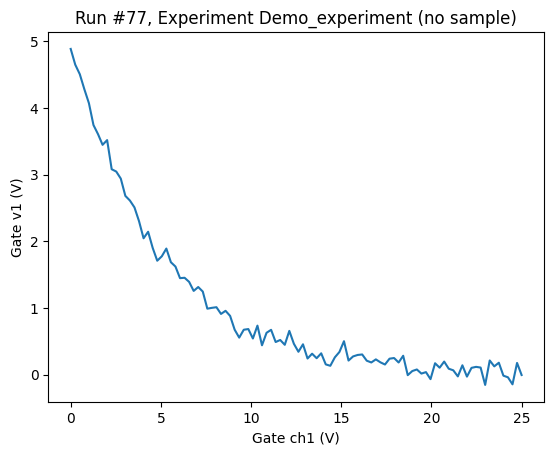

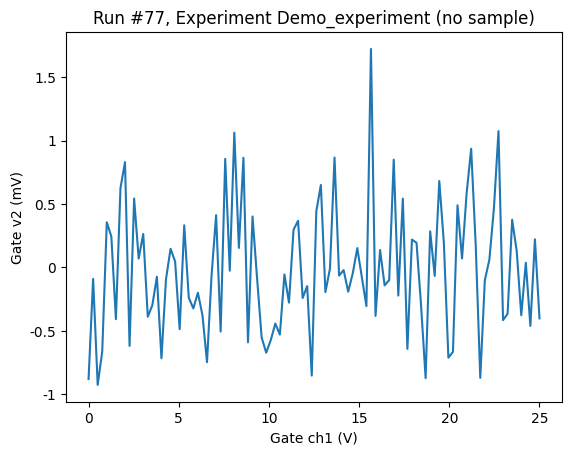

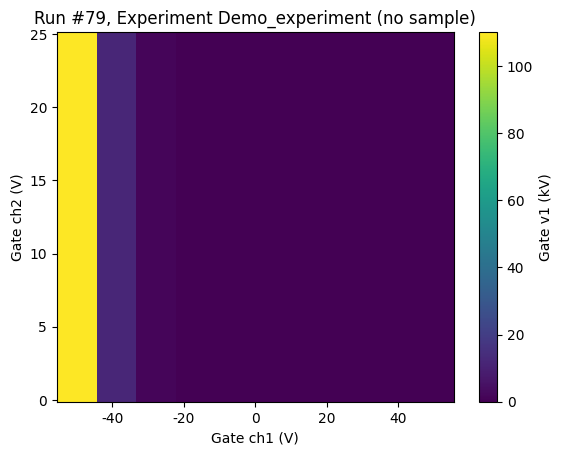

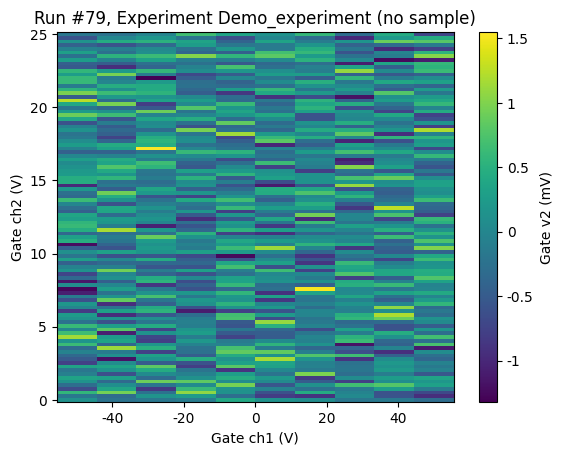

In [6]:
# Examples of 1D sweeps:

# A 1D sweep in which channel 1 of the DAC is stepped from 0 V to 25 V in 100 steps each taking 0.01 s, and the results are written to the database every 0.1 s. The inputs to both channels of the DMM are recorded, and the results are live-plotted in plottr-inspectr.
do1d(dac.ch1, 0, 25, 100, 0.01, dmm.v1, dmm.v2, write_period=0.1)

# A similar sweep, in which the results are also plotted here in the IDE:
do1d(dac.ch1, 0, 25, 100, 0.01, dmm.v1, dmm.v2, write_period=0.1, do_plot=True)

# A similar sweep in which only one of the DMM inputs is recorded:
do1d(dac.ch1, 0, 25, 100, 0.01, dmm.v1, write_period=0.1)

# Example of a 2D sweep:

# Sweeping channels 1 and 2 of the DAC, and measuring inputs 1 and 2 of the DMM:
do2d(dac.ch1, -50, 50, 10, 1, dac.ch2, 0, 25, 100, 0.01, dmm.v1, dmm.v2, write_period=0.1,do_plot=True)

#### Examples of trace-by-trace sweeps
Some instruments, such as oscilloscopes and spectrum analysers, acquire an entire trace at once, instead of a single data point as a DMM does.
The doNd commands also let you acquire data like this. However, they treat the entire trace as one measurement, which has two consequences:
1. A 1D array of data is acquired as a single trace using do0d(), a 2D array of data is acquired as a 1D array of traces using do1d(), and so on.
2. doNd() does not set the start, stop, or number of points of the traces; these must be set beforehand.

The following examples show how to acquire data from channel A of our dummy oscilloscope.

Starting experimental run with id: 80. Using 'qcodes.dataset.do0d'
Starting experimental run with id: 81. Using 'qcodes.dataset.do1d'
Starting experimental run with id: 82. Using 'qcodes.dataset.do1d'


(results #82@C:\Users\lairde\OneDrive - Lancaster University\OneDrive Documents\Teaching\My classes\Python sandpit\Demo_db.db
 ----------------------------------------------------------------------------------------------------------------------------
 dac_ch1 - numeric
 oscilloscope_ChanA_dummy_sp_axis - array
 oscilloscope_ChanA_dummy_parameter_with_setpoints - array
 dmm_v1 - numeric,
 (<Axes: title={'center': 'Run #82, Experiment Demo_experiment (no sample)'}, xlabel='Gate ch1 (V)', ylabel='Dummy sp axis (some unit)'>,
  <Axes: title={'center': 'Run #82, Experiment Demo_experiment (no sample)'}, xlabel='Gate ch1 (V)', ylabel='Gate v1 (V)'>),
 (<matplotlib.colorbar.Colorbar at 0x2106ba4b350>, None))

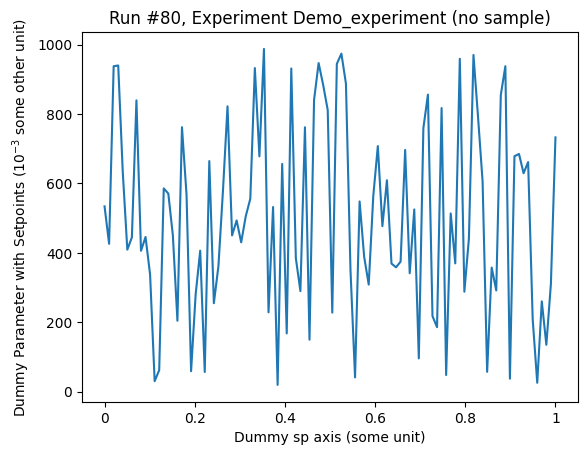

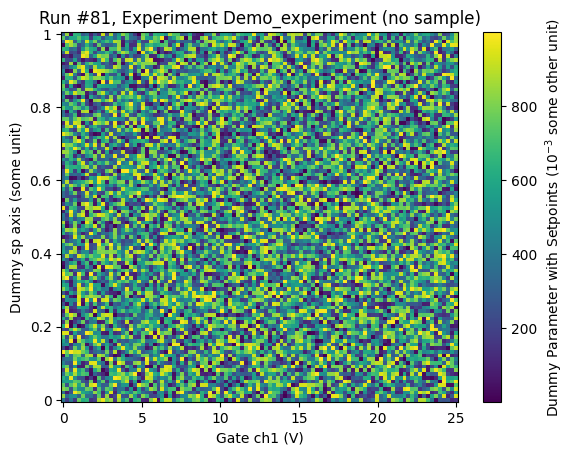

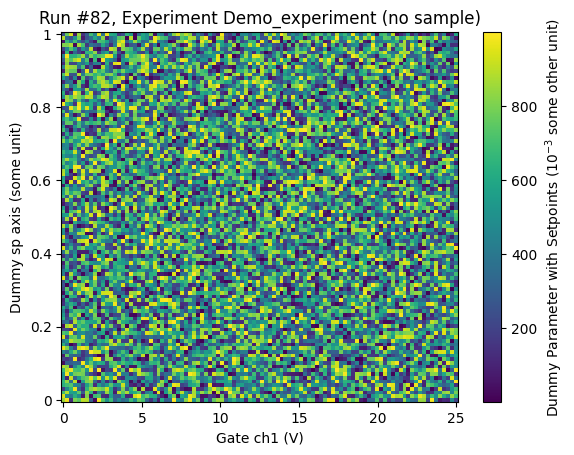

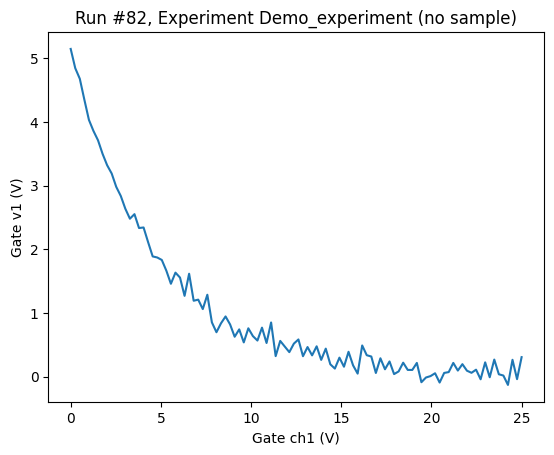

In [7]:
# Set start, stop, and number of points:
oscilloscope.A.dummy_start(0)
oscilloscope.A.dummy_stop(1)
oscilloscope.A.dummy_n_points(100)

# Take a 1D trace from the dummy oscilloscope, using do0d.
do0d(oscilloscope.A.dummy_parameter_with_setpoints, do_plot=True)

# Take a 2D scan from the dummy oscilloscope, using do1d:
do1d(dac.ch1, 0, 25, 100, 0.01, oscilloscope.A.dummy_parameter_with_setpoints, do_plot=True)

# Take a 2D scan from the dummy scope simultaneously with a 1D scan from the dummy DMM, using do1d:
do1d(dac.ch1, 0, 25, 100, 0.01, oscilloscope.A.dummy_parameter_with_setpoints, dmm.v1, do_plot=True)

## Removing QCoDeS
To remove QCodes and start again, do:
1. Make sure the qcodes environment is not running in any anaconda terminal; you can do this by closing the terminal window or running
   
        conda deactivate
   
2. To remove the qcodes environment, run at an anaconda prompt:

        conda remove --name qcodes --all

3. To check qcodes was removed, run:

        conda env list

   to show all conda environments. QCoDeS should not appear on the list.